# CS4305TU: Week 6 - Artificial Neural Network - Lecture 1
**6 October 2021**

- Sander van Cranenburgh
- Francisco Garrido-Valenzuela

**This notebook will not be graded. You do not have to submit the notebook.**

## 1. Set up your environment

You need to set up your environment based on which platform you would like to use. In this case we offer two options:

- Google Colaboratory (Colab)
- Jupyter Lab or Notebooks (Local)

### Using Colab

Students using **Colab**, just need to install **Biogeme**. Biogeme is a Python package designed for the maximum likelihood estimation of parametric models in general, with a special emphasis on discrete choice models. Just run the following notebook cell:

In [3]:
# Uncomment and run this cell if you are using Google Colab (keep the exclamation mark)
#!pip install biogeme
#!git clone https://github.com/cs4305tu/exercises
#root = 'exercises/'

### Using local environment

Students using their *local environments*, need to install all the dependencies used in this *Week 6*, to ensure compatibility, they also need to check the versions of each dependency. All dependencies are contained in the text file: **requirements.txt**. Just run the following notebook cell:

In [7]:
# Uncomment and run this cell if you are using your local environment (keep the exclamation mark)
#!pip3 install -r requirements.txt
#root = ''

<br><br><br>
## Exercise 1: My first discrete choice model

**Objective:**  Acquire a basic understanding of and feeling for choice behaviour modelling 

### i. import Python packages and modules

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import biogeme.biogeme as bio
import biogeme.database as db
import biogeme.optimization as opt
import biogeme.messaging as msg
from biogeme import models
from biogeme.expressions import Beta

pd.set_option('display.float_format', lambda x: '%.1f' % x)

### ii. Load the data and create a dataframe

In [9]:
# Filepath to csv database 
db_file = f'{root}datasets/dcm/smartphone_choicedata2021.csv'

# Create a DataFrame with pandas and database variable for Biogeme estimation
df = pd.read_csv(db_file, sep='\t')
database = db.Database('smartphone_choicedata2021', df)

### iii. Inspect the data 

In [10]:
df.head()

,ID,COST_1,SIZE_1,STORAGE_1,CAM_1,COST_2,SIZE_2,STORAGE_2,CAM_2,COST_3,SIZE_3,STORAGE_3,CAM_3,CHOICE,GENDER,INC,AVAIL_1,AVAIL_2,AVAIL_3
0,1,500,6.4,256,1,400,5.8,32,4,600,6.0,64,2,2,0,2,1,1,1
1,1,600,6.0,64,2,400,6.4,32,1,500,5.8,256,4,3,0,2,1,1,1
2,1,400,5.8,32,1,700,6.4,256,3,700,6.0,64,2,2,0,2,1,1,1
3,1,400,5.8,64,4,500,6.2,64,1,500,6.4,128,1,2,0,2,1,1,1
4,1,700,6.0,64,2,400,5.8,256,1,600,6.4,32,4,3,0,2,1,1,1


In [11]:
df.describe()

,ID,COST_1,SIZE_1,STORAGE_1,CAM_1,COST_2,SIZE_2,STORAGE_2,CAM_2,COST_3,SIZE_3,STORAGE_3,CAM_3,CHOICE,GENDER,INC,AVAIL_1,AVAIL_2,AVAIL_3
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,500.5,530.0,6.1,105.6,2.3,530.0,6.1,105.6,2.3,530.0,6.1,105.6,2.3,2.0,0.5,1.7,1.0,1.0,1.0
std,288.7,110.0,0.2,82.3,1.1,110.0,0.2,82.3,1.1,110.0,0.2,82.3,1.1,0.9,0.5,0.6,0.0,0.0,0.0
min,1.0,400.0,5.8,32.0,1.0,400.0,5.8,32.0,1.0,400.0,5.8,32.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
25%,250.8,400.0,5.8,32.0,1.0,400.0,5.8,32.0,1.0,400.0,5.8,32.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
50%,500.5,500.0,6.0,64.0,2.0,500.0,6.0,64.0,2.0,500.0,6.0,64.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0
75%,750.2,600.0,6.2,128.0,3.0,600.0,6.2,128.0,3.0,600.0,6.2,128.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0
max,1000.0,700.0,6.4,256.0,4.0,700.0,6.4,256.0,4.0,700.0,6.4,256.0,4.0,3.0,1.0,3.0,1.0,1.0,1.0


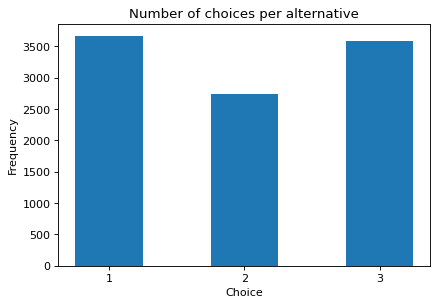

In [12]:
# Show how often each alternative is chosen
fig=plt.figure(figsize=(6,4), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(df.CHOICE, bins = [0.75, 1.25, 1.75, 2.25, 2.75, 3.25])
plt.xticks((1, 2, 3))
plt.title('Number of choices per alternative')
plt.xlabel('Choice')
plt.ylabel('Frequency');

### QUESTION 1. Do you have a feeling for the data set?, i.e.
- #### (a) Do you understand all features, and their levels?
- #### (b) Are the output class labels nicely balanced?

<font color='red'>
    
**ANSWER**
    
...

In [13]:
# The following statement allows you to use the names of the variable stored in Biogeme as Python variables.
globals().update(database.variables)

### iv. Declaring the parameters of the discrete choice model to be estimated

Below we declare which parameters of the discrete choice model need to be estimated using the *Beta* syntax. <br>
For each parameter we declare its:
* *name* for latter use. 
* *starting value* for the numerical optimisation. Usually 0.
* *lower bound* Constrain the estimate to be larger  than e.g. 0. Use "None" if there is no lower bound constraint.
* *upper bound* Constrain the estimate to be smaller than e.g. 1. Use "None" if there is no upper bound constraint.
* *status* Declares wheter the parameter needs to be estimated. 0 = estimate, 1 = fixed.

In [14]:
B_cost = Beta('B_cost', 0, None, None, 0)
B_size = Beta('B_size', 0, None, None, 0)
B_storage = Beta('B_storage', 0, None, None, 0)
B_camera = Beta('B_camera', 0, None, None, 0)

### v. The utility function
Here we define the utility function. This function postulates how the decision makers, *n*, experience utility, *U*, for alternatives, *i*, presented to them. <br> Part of the utility experienced is due to factors observable to the analyst; part is due to unobservable factors: 

$ U_{in} = V_{in} + \epsilon_{in}$. <br> 

Commonly the observable part utility *V* is postulated to be linear-additive: 

$ V_{in} = \sum_{m}\beta_m x_{imn}$

Finally, note that it is common to assume that the utility function is the same for all decision makers *n*. Therefore *n* drops from the utility specification. <br>



In [15]:
# Utility functions
V1 = B_cost * COST_1 + B_size * SIZE_1 + B_storage * STORAGE_1 + B_camera * CAM_1
V2 = B_cost * COST_2 + B_size * SIZE_2 + B_storage * STORAGE_2 + B_camera * CAM_2
V3 = B_cost * COST_3 + B_size * SIZE_3 + B_storage * STORAGE_3 + B_camera * CAM_3

Next we associate the defined utility functions with the numering of the alternatives in the data

In [16]:
# Associate utility functions with the numbering of alternatives in df.CHOICE
V = {1: V1, 2: V2, 3: V3}

### vi. Availability of alternatives

Next we declare which alternatives are available (i.e. present to the decision maker and feasible to choose) in a choice task. This availability is defined by a variable *AVAIL_* in the data, where: <br>
* *AVAIL_* = 1 means the alternative is available
* *AVAIL_* = 0 means the alternative is unavailable

In [17]:
# Associate the availability conditions with the alternatives
av = {1: AVAIL_1, 2: AVAIL_2, 3: AVAIL_3}

### vii. Estimate the discrete choice model
Next we estimate the discrete choice model. That is, we **maximise** the **likelihood of the data** (i.e. the choices made) given the model.

In [18]:
# Definition of the model. This is the contribution of each observation to the log likelihood function.
prob = models.loglogit(V, av, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, prob)
biogeme.modelName = 'My first discrete choice model'
biogeme.generatePickle = False
biogeme.generateHtml = False

# Calculate the null log likelihood for reporting.
biogeme.calculateNullLoglikelihood(av)

# Estimate the parameters
results = biogeme.estimate()

# Report the results in a pandas table
print('Estimated parameters')
print('----------')
pandasResults = results.getEstimatedParameters()
print(pandasResults[['Value','Std err','t-test','p-value']])


Estimated parameters
----------
           Value  Std err  t-test  p-value
B_camera     0.8      0.0    65.3      0.0
B_cost      -0.0      0.0   -59.5      0.0
B_size       2.1      0.1    38.3      0.0
B_storage    0.0      0.0    31.7      0.0


### QUESTION 2. Interpret the estimated parameters
- #### (a) Do the parameters have the expected sign? Explain your answer.
- #### (b) What units do the betas have?

<font color='red'>

**ANSWER**
    
...

### viii. Compute Willingness-to-Pay estimates
Under the assumption that utility is linear-additive we can straightforwardly compute the Willingness-to-Pay estimates, by evaluating their ratios. These WtP estimates give the *average* willingness to pay across the sampled population. This is shown below.

In [19]:
# Get the results in a pandas table
print('Willingness-to-Pay estimates')
print('----------')
betas = results.getBetaValues()
WtP_storage = betas['B_storage']/-betas['B_cost']
WtP_size = betas['B_size']/-betas['B_cost']
WtP_camera = betas['B_camera']/-betas['B_cost']

print('Willingness to Pay estimate for Storage         = €', "{:.2f}".format(WtP_storage),'   per extra Gigabite')
print('Willingness to Pay estimate for Size            = €', "{:.2f}".format(WtP_size),' per extra diagonal inch')
print('Willingness to Pay estimate for Camera quality  = €', "{:.2f}".format(WtP_camera),'  per unit quality level improvement')

Willingness-to-Pay estimates
----------
Willingness to Pay estimate for Storage         = € 0.42    per extra Gigabite
Willingness to Pay estimate for Size            = € 193.64  per extra diagonal inch
Willingness to Pay estimate for Camera quality  = € 74.67   per unit quality level improvement


Suppose a smartphone maker is considering to bring one of two smartphone model to the market.
Per sold item both models yield the same profit. So, the most profitable model is the one that sells best.
We can use the **WtP** estimates above to determine whether the average decision-maker (consumer) is willing to pay the extra **€300** to attain the high-end features 

In other words, we can use the WtP estimates to determine which model the smartphone maker can best bring to the market to maximise profits

| Attribute | SMARTPHONE 1 (mainstream) | SMARTPHONE 2 (high-end) |
| --- | :-: | :-: |
| Size [inch]| 5.8 | 6.2 |
| Storage [Gb]| 128 | 256 |
| Camera quality | mid | high |
| Price [€]| 400 | 700 |

We compute the improvement to go from model 1 to model 2, per attribute:

In [20]:
size_improvement = 6.2 - 5.8 #inches
storage_improvement = 256-128 #Gb
camera_improvement = 3 - 2 # high - mid (unit quality level)

Then we compute the total WtP by multiplying the improvements with the WtPs per attribute:

In [21]:
Willingness_to_pay_SM1_SM2 = WtP_size * size_improvement + WtP_storage * storage_improvement + WtP_camera * camera_improvement
print('Willingness to pay for extra features of the high_end smartphone is €',"{:.2f}".format(Willingness_to_pay_SM1_SM2))

Willingness to pay for extra features of the high_end smartphone is € 205.86


### QUESTION 3. So, which smartphone model can the company best bring to the market?

<font color='red'>

**ANSWER**
    
...

<br><br><br>
## Exercise 2: My first Artificial Neural Network
**Objectives:** 
* Understand how ANNs can be used for choice prediction
* Learn that ANNs are likely to attain comparatively high model performance
* Learn that using ANNs few behavioural inferences can be made


### i. import Python packages and modules

In [22]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, log_loss

### ii. Preprocess the data
#### a. Identify features and outputs in the database

In [23]:
# Define the features
X = df[['COST_1','SIZE_1','STORAGE_1','CAM_1','COST_2','SIZE_2','STORAGE_2','CAM_2','COST_3','SIZE_3','STORAGE_3','CAM_3','GENDER','INC']]

# Define the output target
Y = df['CHOICE']

In [24]:
X.head(3)

,COST_1,SIZE_1,STORAGE_1,CAM_1,COST_2,SIZE_2,STORAGE_2,CAM_2,COST_3,SIZE_3,STORAGE_3,CAM_3,GENDER,INC
0,500,6.4,256,1,400,5.8,32,4,600,6.0,64,2,0,2
1,600,6.0,64,2,400,6.4,32,1,500,5.8,256,4,0,2
2,400,5.8,32,1,700,6.4,256,3,700,6.0,64,2,0,2


In [25]:
Y.head(3)

0    2
1    3
2    2
Name: CHOICE, dtype: int64

#### b. Split the data in a training set and a test set 

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

#### c. Rescale the input data

In [27]:
scaler = StandardScaler()  
scaler.fit(X_train)  

# Apply scaler to both the training and test set
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

### iii. Define and ANN and train

The structure of the ANN will be:

- Input layer: All features of X dataframe. It's means all features of all alternatives and sociodemographic characteristics. 
- Hidden layer 1: A fully-connected (FC) layer of 5 nodes
- Hidden layer 2: A fully-connected (FC) layer of 5 nodes
- Output layer: A softmax (activation function) layer to assign probabilities ot each class (choices)

In the next figure, you can see the ANN structure.

<img src="https://github.com/cs4305tu/week6/blob/main/ANNstructure.png?raw=true" width="700"/>

In [28]:
# Train the ANN

# Declare the number of layers and nodes per layer
num_nodes = 5
layers = (num_nodes,num_nodes) # Here we use a network with two hidden layers, with *num_nodes* each 

# Create the ANNs (MultiLayerPerceptron aka MLP)
mlp = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=layers, max_iter=1000) # We use the Adam optimiser, with a learning rate of 1e-5

# Train the ANN. Note that sklearn does not permit anything else than batch gradient descent 
mlp.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), max_iter=1000)

### iv. Evaluate the performance of the trained ANN on the test data

In [29]:
# Use the trained ANN to make predictions for the test data
probs_ANN_X_test = mlp.predict_proba(X_test)

# Compute the prediction performance, based on the cross-entropy (aka log_loss). A lower cross-entropy signals a better model.
cross_entropy_ANN = log_loss(Y_test, probs_ANN_X_test)
print('The cross-entropy on the test data of the ANN is',"{:.3f}".format(cross_entropy_ANN))

The cross-entropy on the test data of the ANN is 0.544


### v. Compare the performance of ANN with the discrete choice models

In [30]:
# To do that, let's compute the cross-entropy of the RUM_MNL discrete choice model
# Note that no distinction needs to be made between the (performance on) the test and train data

# Get the estimated betas from the discrete choice model
betas = results.getBetaValues()

# Define compute objects
prob_1 = models.logit(V, av, 1)
prob_2 = models.logit(V, av, 2)
prob_3 = models.logit(V, av, 3)

# Define dictionary
simulate_dict = {
    'Prob_1': prob_1,
    'Prob_2': prob_2,
    'Prob_3': prob_3}

# Create Biogeme object
simulator = bio.BIOGEME(database, simulate_dict)

# Compute probabilities using the estimated choice model
probs_DCM = simulator.simulate(betas)

# Compute the cross-entropy for the DCM
cross_entropy_DCM = log_loss(df.CHOICE,probs_DCM)

print('The cross-entropy of the DCM is        ',"{:.3f}".format(cross_entropy_DCM))
print('The cross-entropy on the ANN is        ',"{:.3f}".format(cross_entropy_ANN))
print('--> The improvement in cross-entropy is',"{:.3f}".format(cross_entropy_DCM - cross_entropy_ANN))

The cross-entropy of the DCM is         0.710
The cross-entropy on the ANN is         0.544
--> The improvement in cross-entropy is 0.167


### QUESTION 1. To attain this performance improvement, the ANN uses considerably more weights. Compute by hand how many weights this network uses and verify your answer by inspecting the weights

<font color='red'>

**ANSWER** <br>

...

In [31]:
# We can also inspect the trained weights using the following syntax. Use this to verify your answer
trained_weights_L1 = (mlp.coefs_[0]) # weights connecting input and 1st layer
trained_weights_L2 = (mlp.coefs_[1]) # weights connecting 1st and 2nd layer
trained_weights_L3 = (mlp.coefs_[2]) # weights connecting 2st and output layer

trained_biases_L1 = (mlp.intercepts_[0]) # bias weights connecting input and 1st layer
trained_biases_L2 = (mlp.intercepts_[1]) # bias weights connecting 1st and 2nd layer
trained_biases_L3 = (mlp.intercepts_[2]) # bias weights connecting 2st and output layer
no_weights = trained_weights_L1.size + trained_weights_L2.size + trained_weights_L3.size + trained_biases_L1.size + trained_biases_L2.size + trained_biases_L3.size
# print('This network has', no_weights, 'weights')

### vi. Behavioural inferences

Unfortunately, we cannot make behavioural inferences based on the weights of the ANN. However, one simple way to still get a (partial) sense of what the ANN has learned is by simulating the effect of a (change in) attribute levels on the choice probabilities.

To do so, we:

1. Create an ndarray containing the following alternatives. Use Male (GENDER=0) and Income level 2 (INC=2)for the socio-demographic variables
2. Apply the trained ANN to these data points. 
3. Plot the effect of the STORAGE of alternative 3 on the choice Probabilities and Utilties of alternatives 1,2, 3 for a Male with Income level 2.


| COST_1 | SIZE_1 | STORAGE_1 | CAM_1 | COST_2 | SIZE_2 | STORAGE_2 | CAM_2 | COST_3 | SIZE_3 | STORAGE_3 | CAM_3 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 500 | 6.0 | 64 | 2 | 500 | 6.0 | 64 | 2 | 500 | 6.0 | **32**  | 2 |
| 500 | 6.0 | 64 | 2 | 500 | 6.0 | 64 | 2 | 500 | 6.0 | **64**  | 2 |
| 500 | 6.0 | 64 | 2 | 500 | 6.0 | 64 | 2 | 500 | 6.0 | **128** | 2 |
| 500 | 6.0 | 64 | 2 | 500 | 6.0 | 64 | 2 | 500 | 6.0 | **256** | 2 |

/Users/francisco/.pyenv/versions/uyui/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


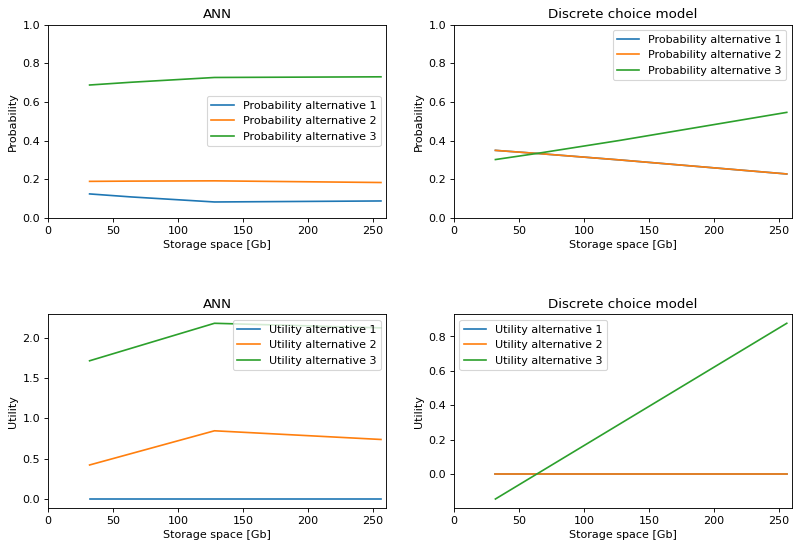

In [32]:
# Step 1: Create an ndarray containing the alternatives in the table above
X_sim = np.array([[500,6.0,64,2,500,6.0,64,2,500,6.0,32,2,0,2],[500,6.0,64,2,500,6.0,64,2,500,6.0,64,2,0,2],[500,6.0,64,2,500,6.0,64,2,500,6.0,128,2,0,2],[500,6.0,64,2,500,6.0,64,2,500,6.0,256,2,0,2]])

# Step 2: Apply the trained ANN to these data points

# Rescale input data using the same scaler as used for training
X_sim_scaled = scaler.transform(X_sim) 

# Simulate the choice probabilities by applying the trained ANN
probs_ANN_X_sim = mlp.predict_proba(X_sim_scaled)

# Step 3: Plot the effect of the STORAGE of alternative 3 on the choice probabilities

fig=plt.figure(figsize=(12,8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
x_levels = np.array([32, 64, 128, 256])
plt.plot(x_levels,probs_ANN_X_sim[:,0], label= "Probability alternative 1")
plt.plot(x_levels,probs_ANN_X_sim[:,1], label= "Probability alternative 2")
plt.plot(x_levels,probs_ANN_X_sim[:,2], label= "Probability alternative 3")
plt.title('ANN')
plt.legend(loc = "best")
plt.xlabel("Storage space [Gb]")
plt.ylabel("Probability")
plt.xlim([0,260])
plt.ylim([0, 1])

# Step 3: Plot the effect of the STORAGE of alternative 3 on the utilities
plt.subplot(223)
utility_ANN_X_sim_V1 = 0 # As utilities are not absolute, we can arbitrarily fix V1 to zero
utility_ANN_X_sim_V2 = np.log(probs_ANN_X_sim[:,1]/probs_ANN_X_sim[:,0]) # Utility of alternative 2 relative to V1
utility_ANN_X_sim_V3 = np.log(probs_ANN_X_sim[:,2]/probs_ANN_X_sim[:,0]) # Utility of alternative 3 relative to V1
plt.plot(x_levels,np.tile(utility_ANN_X_sim_V1,(len(x_levels))), label = "Utility alternative 1")
plt.plot(x_levels,utility_ANN_X_sim_V2,                          label = "Utility alternative 2")
plt.plot(x_levels,utility_ANN_X_sim_V3,                          label = "Utility alternative 3")
plt.legend(loc = "best")
plt.title('ANN')
plt.xlabel("Storage space [Gb]")
plt.ylabel("Utility")
plt.xlim([0,260])

# For comparison we also add the plots for the DCM
# Compute utility using the estimated betas
V1_X_sim = betas['B_cost']*X_sim[:,0] + betas['B_size']*X_sim[:,1] + betas['B_storage']*X_sim[:,2] + betas['B_camera']*X_sim[:,3]
V2_X_sim = betas['B_cost']*X_sim[:,4] + betas['B_size']*X_sim[:,5] + betas['B_storage']*X_sim[:,6] + betas['B_camera']*X_sim[:,7]
V3_X_sim = betas['B_cost']*X_sim[:,8] + betas['B_size']*X_sim[:,9] + betas['B_storage']*X_sim[:,10] + betas['B_camera']*X_sim[:,11]

# Compute probabilities
P1_sim = np.exp(V1_X_sim) / (np.exp(V1_X_sim)+np.exp(V2_X_sim)+np.exp(V3_X_sim))
P2_sim = np.exp(V2_X_sim) / (np.exp(V1_X_sim)+np.exp(V2_X_sim)+np.exp(V3_X_sim))
P3_sim = np.exp(V3_X_sim) / (np.exp(V1_X_sim)+np.exp(V2_X_sim)+np.exp(V3_X_sim))
P_sim = np.transpose([P1_sim, P2_sim, P3_sim])

plt.subplot(222)
x_levels = np.array([32, 64, 128, 256])
plt.plot(x_levels,P_sim[:,0], label= "Probability alternative 1")
plt.plot(x_levels,P_sim[:,1], label= "Probability alternative 2")
plt.plot(x_levels,P_sim[:,2], label= "Probability alternative 3")
plt.title('Discrete choice model')
plt.legend(loc = "best")
plt.xlabel("Storage space [Gb]")
plt.ylabel("Probability")
plt.xlim([0,260])
plt.ylim([0, 1])

plt.subplot(224)
x_levels = np.array([32, 64, 128, 256])
plt.plot(x_levels,V1_X_sim-V1_X_sim, label= "Utility alternative 1")
plt.plot(x_levels,V2_X_sim-V1_X_sim, label= "Utility alternative 2")
plt.plot(x_levels,V3_X_sim-V1_X_sim, label= "Utility alternative 3")
plt.title('Discrete choice model')
plt.legend(loc = "best")
plt.xlabel("Storage space [Gb]")
plt.ylabel("Utility")
plt.xlim([0,260])

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace = 0.5)

### QUESTION 2. Has the ANN learned behaviourally meaningful/plausible relations?. In other words, look at what relations the ANN has learned and compare with what you would expect based on common sense and behavioural intuition

<font color='red'>

**ANSWER** <br>

...

### QUESTION 3: Re-run the code a couple of times to see how stable (robust) the results in the plots above are. Are they stable?

<font color='red'>

**ANSWER** <br>

...

### QUESTION 4: Based on the model estimation of Exercise 1 (Discrete choice model) and 2 (ANN). Any kind of variables missing in DCM compared to ANN when model is estimated? 

<font color='red'>

**ANSWER** <br>

...